# Lab 4: Initial Value Problems (IVPs)

## 1.
### 1.1.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

import scipy.optimize as spo

In [13]:
# create font
font = {'family':'monospace', 'color':'black', 'size':13} # set font dictionary

# create graph format
plt.rcParams.update({
                    "legend.facecolor" : 'white',
                    "font.family" : "DejaVu Sans",
                    "xtick.bottom" : True,
                    "ytick.left" : True,
                    "legend.edgecolor" : 'black',
                    "legend.fancybox" : False,
                    'axes.facecolor' : 'white',
                    'legend.edgecolor' : 'black',
                    'xtick.labelsize' : 11,
                    'ytick.labelsize' : 11,
                    'axes.labelsize' : 13,
                    'axes.grid' : False,
                    'axes.edgecolor' : 'black',
                    'axes.linewidth': 1
                     })

Use the $O(h)$ approximation to find solution to a generic IVP i.e. use the backward and forward formulas to obtain the implicit and explicit schemes.

In [7]:
# create function(s) for each method

def euler(t,f,y0):
    y = np.zeros(len(t))
    y[0] = y0
    h = t[1]-t[0]

    for i in range(len(t)-1):
        y[i+1]=y[i]+h*f(t[i],y[i])
    return y

def mod_euler(t,f,y0):
    y = np.zeros(len(t));y[0]=y0
    h = t[1]-t[0]

    for i in range(len(t)-1):
        ye = y[i]+h*f(t[i],y[i])
        y[i+1]=y[i]+h/2*(f(t[i],y[i])+f(t[i]+h,ye))
    return y

def imp_euler(t,f,y0):
    y = np.zeros(len(t));y[0]=y0
    h = t[1]-t[0]

    for i in range(len(t)-1):
        ftm = lambda x : y[i]+h*f(t[i+1],x) - x
        y[i+1]=spo.root(ftm,0).x
    return y

*[See handwritten notes]*

### 1.2.
*[See handwritten notes]*

### 1.3.

Comparison of Euler methods with multistep method at a single point $t_f = 8 h$ for a number of intervals $n$.

In [11]:
# create new multistep method
def multi(t, f, y0):
    y = np.zeros(len(t))
    y[0] = y0
    y[1] = mod_euler(t[0:2], f, y0)[-1] # approximate first point
    h = t[1] - t[0]

    for i in range(len(t) - 2):
        y[i+2] = y[i]+2 * h * f(t[i+1], y[i+1])
    return y

# set variables
kappa = np.log(2) / 6
y0, ti, tf = 8, 0, 8 # intial conditions
n_test = 1000 # number of test intervals

# create function f(x)
def func(t,y):
    return -kappa *  y

# create analytical solution
def an_sol(t, y0):
    return y0 * np.exp(-kappa * t) # find integral of f(x)

# create empty error arrays
mul_err = np.zeros(n_test)
eul_err = mul_err.copy()
mod_err = mul_err.copy()

# find error for each numerical method
for n in range(3,n_test):
    t = np.linspace(ti, tf, n+1)

    # find analytical solutions
    y_mul = multi(t, func, y0)
    y_mod = mod_euler(t, func, y0)
    y_eul = euler(t, func, y0)

    # find absolute errors
    mul_err[n] = abs(y_mul[-1] - an_sol(t[-1], y0))
    eul_err[n] = abs(y_mod[-1] - an_sol(t[-1], y0))
    mod_err[n] = abs(y_eul[-1] - an_sol(t[-1], y0))

nt =  np.arange(3, n_test)

Text(0.5, 1.0, 'Comparison of methods for a single point ($t_f$)')

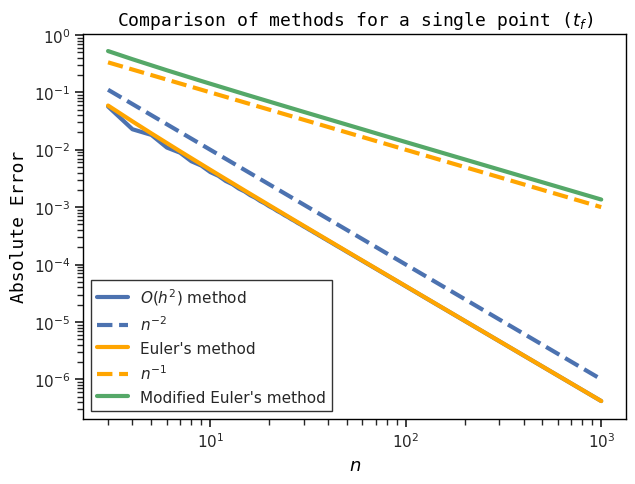

In [34]:
# plot graphs
plt.figure(figsize=(7,5))

plt.loglog(nt, mul_err[3::], 'b-', label='$O(h^2)$ method', lw=3)
plt.loglog(nt, 1/nt**2, 'b--', label='$n^{-2}$', lw=3) 
plt.loglog(nt, eul_err[3::], '-', label='Euler\'s method', lw=3, color='orange')
plt.loglog(nt, 1/nt, '--', label='$n^{-1}$', lw=3, color='orange')  
plt.loglog(nt, mod_err[3::], 'g', label='Modified Euler\'s method', lw=3)

# format graph
plt.ylabel('Absolute Error', fontdict=font)
plt.xlabel('$n$', fontdict=font)
plt.legend(loc='best')
plt.title('Comparison of methods for a single point ($t_f$)', fontdict=font)

## 2.
### 2.1.
*[See handwritten notes]*

### 2.2.

Implement new approximation that utilises Simpson's method.

Text(0.5, 1.0, 'Comparison of methods for a single point ($t_f$)')

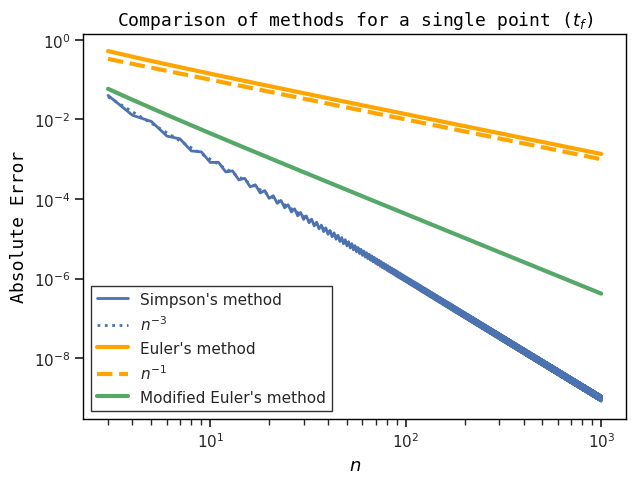

In [37]:
# create simpson's method approximation
def int_sim(t, f, y0):
    y = np.zeros(len(t))
    y[0] = y0
    h = t[1] - t[0] # step size
    y[1] = mod_euler(t[0:2], f, y0)[-1] # approximate first point

    for i in range(len(t)-2):
        y_eul = y[i+1] + h * f(t[i+1], y[i+1])
        y_mod = y[i+1] + h / 2 * (f(t[i+1], y[i+1]) + f(t[i+2], y_eul))
        y[i+2] = y[i] + h / 3 * (f(t[i], y[i]) + 4 * f(t[i+1], y[i+1]) + f(t[i+2], y_mod))
    return y
   
sim_err = np.zeros(n_test)

for n in range(3, n_test):
    t = np.linspace(ti, tf, n+1)

    # find numerical solutions to f(x)
    yn_i = int_sim(t, func, y0)
    yn_e = euler(t, func, y0)
    yn_m = mod_euler(t, func, y0)
    
    # find absolute errors
    sim_err[n] = abs(yn_i[-1] - an_sol(t[-1], y0))
    mod_err[n] = abs(yn_m[-1] - an_sol(t[-1], y0))
    eul_err[n] = abs(yn_e[-1] - an_sol(t[-1], y0))


Text(0.5, 1.0, 'Comparison of methods for a single point ($t_f$)')

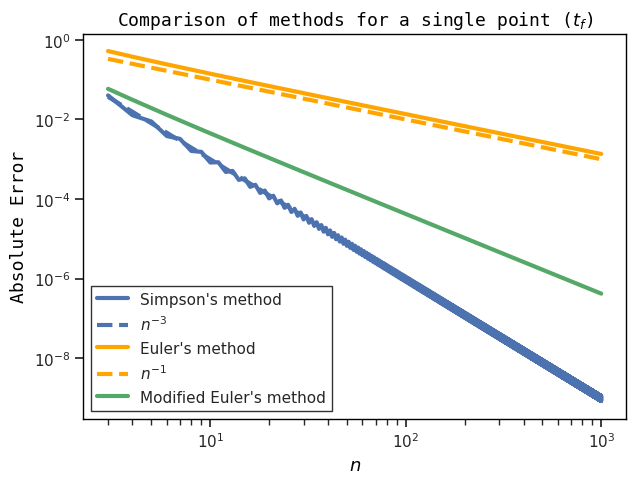

In [49]:
# plot graphs
plt.figure(figsize=(7,5))

plt.loglog(nt, sim_err[3::], '-', label='Simpson\'s method', lw=3, color='b') # simpson's method
plt.loglog(nt, 1/nt**3, '--', label='$n^{-3}$', lw=3, color='b')  
plt.loglog(nt, eul_err[3::], '-', label='Euler\'s method', lw=3, color='orange') # euler's method
plt.loglog(nt, 1/nt, '--', label='$n^{-1}$', lw=3, color='orange')  
plt.loglog(nt, mod_err[3::], 'g', label='Modified Euler\'s method', lw=3) # modified euler's method

# format graph
plt.ylabel('Absolute Error', fontdict=font)
plt.xlabel('$n$', fontdict=font)
plt.legend(loc='best')
plt.title('Comparison of methods for a single point ($t_f$)', fontdict=font)


## 3.
### 3.1.

```
def midpoint(t, f, y0):
    y = np.zeros(len(t)); y[0] = y0
    h = t[1] - t[0]
    for i in range(len(t)-1):
    t_m = t[i] + h / 2 # t_i+h/2 - midpoint
    y_m = y[i] + h / 2 * f(t[i], y[i]) # approx. to f(t_i+h/2,y(t_i+h/2))
    y[i+1] = y[i] + h * f(t_m, y_m)
    return y
```

The above code solves IVPs using two iterations of Eulers $O(h)$ method. This is known because an approximation with Euler's method is of the form $y_{n+1} = y_n + hf(t_m, y_m)$. The last two lines of the for loop utilises this with different step sizes.

### 3.2.

Determine the order of the above numerical solution. This can be done simply by comparing absolute error to plots of $n^{-3}$, $n^{-2}$, $n^{-1}$ etc. again using a single point ($t_f$).

In [53]:
# create midpoint approximation
def midpoint(t, f, y0):
    y = np.zeros(len(t))
    y[0] = y0
    h = t[1] - t[0]

    for i in range(len(t)-1):
        t_m = t[i] + h / 2
        y_m = y[i] + h / 2 * f(t[i], y[i])
        y[i+1] = y[i] + h * f(t_m, y_m)
    return y

mid_err = np.zeros(n_test)

for n in range(3, n_test):
    t = np.linspace(ti, tf, n+1)
    y_mid = midpoint(t, func, y0)
    mid_err[n] = abs(y_mid[-1] - an_sol(t[-1], y0))    

Text(0.5, 1.0, 'Determining order of method ($t_f$)')

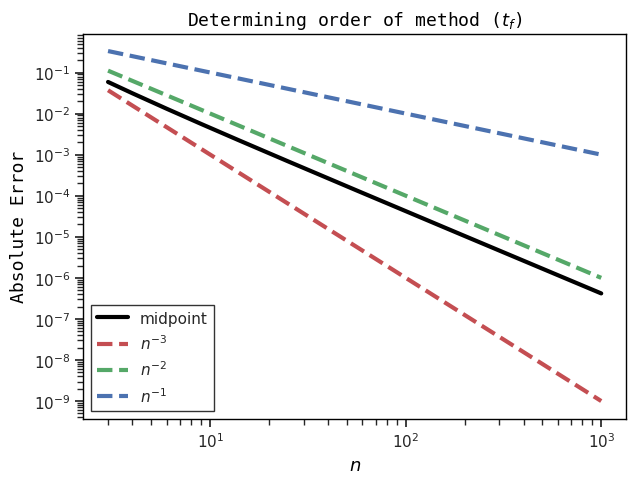

In [58]:
# plot graphs
plt.figure(figsize=(7,5))

plt.loglog(nt, mid_err[3::], label='midpoint', lw=3, color='black')
plt.loglog(nt, 1/nt**3, '--', label='$n^{-3}$',  lw=3, color='r')
plt.loglog(nt, 1/nt**2, '--', label='$n^{-2}$', lw=3, color='g')  
plt.loglog(nt, 1/nt, '--', label='$n^{-1}$', lw=3, color='b')  

# format graph
plt.ylabel('Absolute Error', fontdict=font)
plt.xlabel('$n$', fontdict=font)
plt.legend(loc='best')
plt.title('Determining order of method ($t_f$)', fontdict=font)

Therefore, method is of the form $O(h^2)$.

## 4.

The Person drinks caffeine at 7 am, 10 am and 3 pm. Determine their caffeine absorption throughout the day.

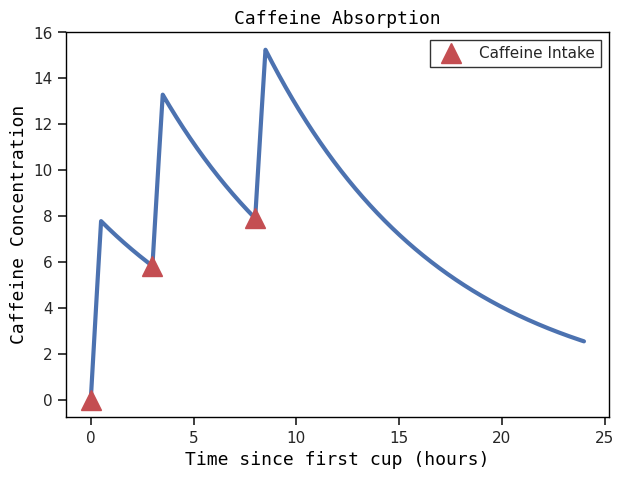

In [ ]:
kappa = np.log(2) / 6

#  create function for coffee intake
def coffee(t, t0):
    return 16 * (t >= t0) * (t <= t0 + 0.5)

# create differential function
def func(t,y):
    # modified phenomenological model
    # adjusted for caffeine intake
    intake = coffee(t,0) + coffee(t,3) + coffee(t,8) # time in hours
    return -kappa * y + intake

t = np.arange(0, 24, .001)
y = mod_euler(t, func, 0) # integrate differential function

# plot graph
plt.figure(figsize=(7,5))

plt.plot(t,y, lw=3)
plt.plot(3, y[np.where(t==3)], '^', ms=10, label='Caffeine Intake', color='r')
plt.plot(8, y[np.where(t==8)], '^', ms=10, color='r')
plt.plot(0, y[np.where(t==0)], '^', ms=10, color='r')

# format graph
plt.title('Caffeine Absorption', fontdict=font)
plt.xlabel('Time since first cup (hours)', fontdict=font)
plt.ylabel('Caffeine Concentration', fontdict=font)
plt.legend(loc='best')

The person still has caffeine in their system at each point of drinking coffee.